Caitlin Lindsay

Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

In [1]:
!pip install ucimlrepo

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
# metadata 
print(wholesale_customers.metadata) 
  
# variable information 
print(wholesale_customers.variables) 


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [3]:
print(X.columns)
print(y.head())

df = pd.DataFrame(X, columns=wholesale_customers.variables.name)

# Add the target variable 'y' to the DataFrame
df['Region'] = y
df.head()

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')
   Region
0       3
1       3
2       3
3       3
4       3


name,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


$\textbf{EDA}$

$\textbf{TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.}$

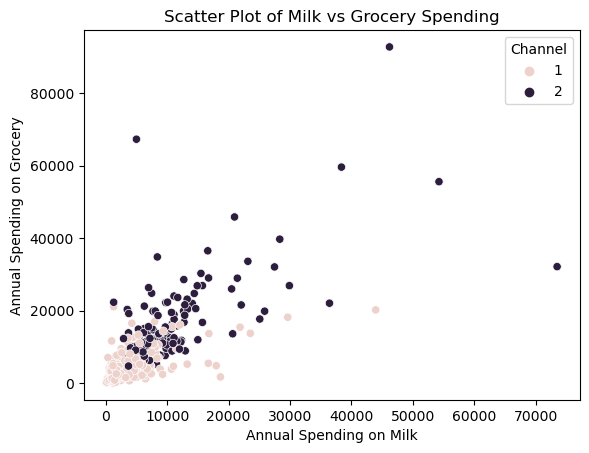

In [4]:
sns.scatterplot(data=X, x='Milk', y='Grocery', hue='Channel')
plt.title('Scatter Plot of Milk vs Grocery Spending')
plt.xlabel('Annual Spending on Milk')
plt.ylabel('Annual Spending on Grocery')
plt.show()

$\textbf{TASK: Use seaborn to create a histogram of MILK spending, colored by Channel.}$<br>
$\textbf{Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?}$

C:\Users\Cait\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cait\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Cait\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Cait\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

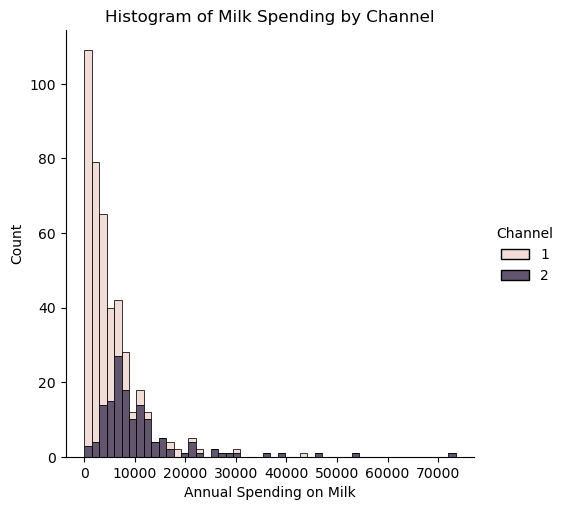

In [5]:
sns.displot(data=X, x='Milk', hue='Channel', multiple='stack')
plt.title('Histogram of Milk Spending by Channel')
plt.xlabel('Annual Spending on Milk')
plt.show()


$\textbf{TASK: Create an annotated clustermap of the correlations between spending on different cateogires.}$

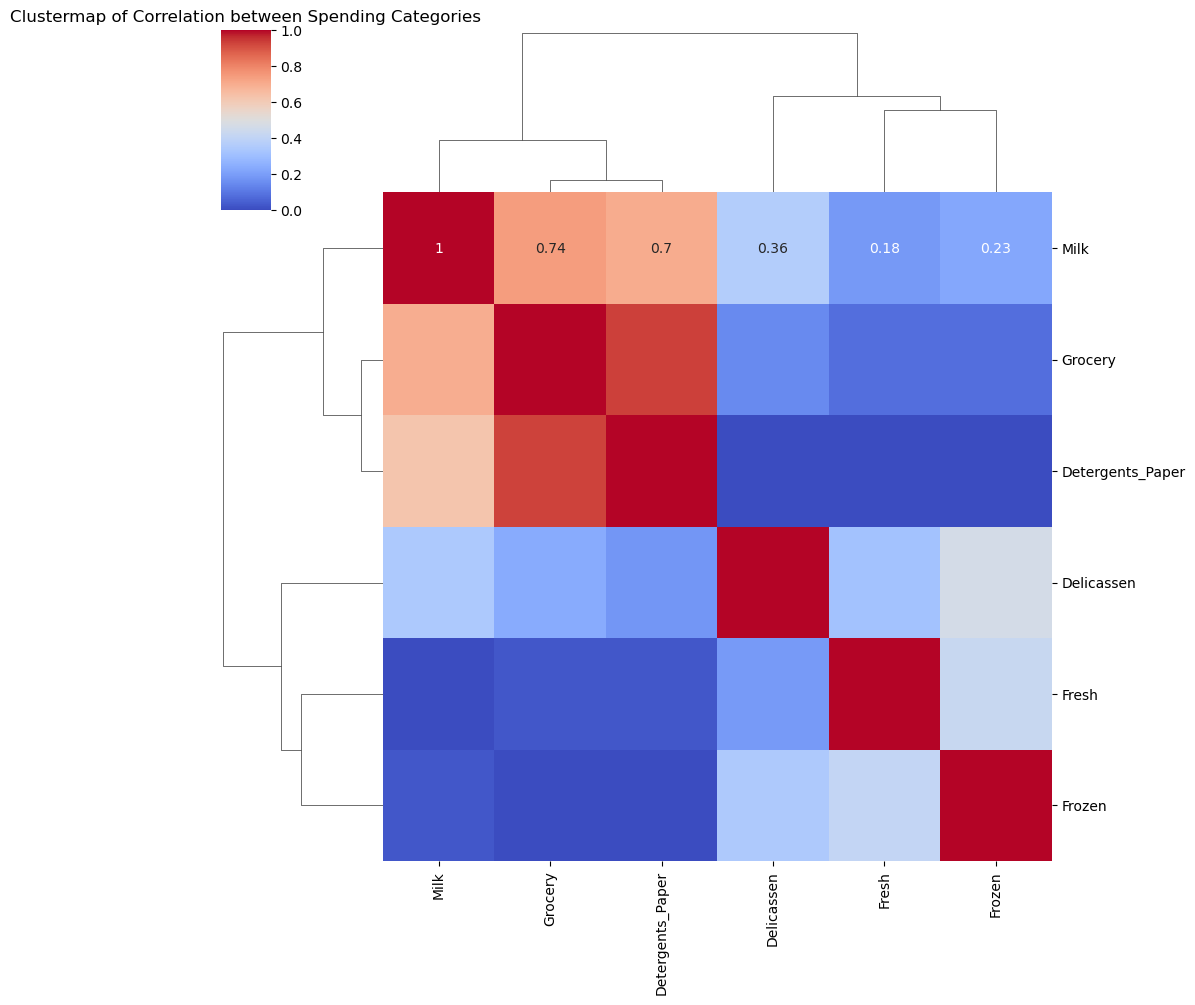

In [6]:
# Calculate the correlation matrix
spending_categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
corr = X[spending_categories].corr()

# Create a clustermap
sns.clustermap(corr, annot=True, cmap='coolwarm', standard_scale=1)
plt.title('Clustermap of Correlation between Spending Categories')
plt.show()


$\textbf{TASK: Create a PairPlot of the dataframe, colored by Region.}$

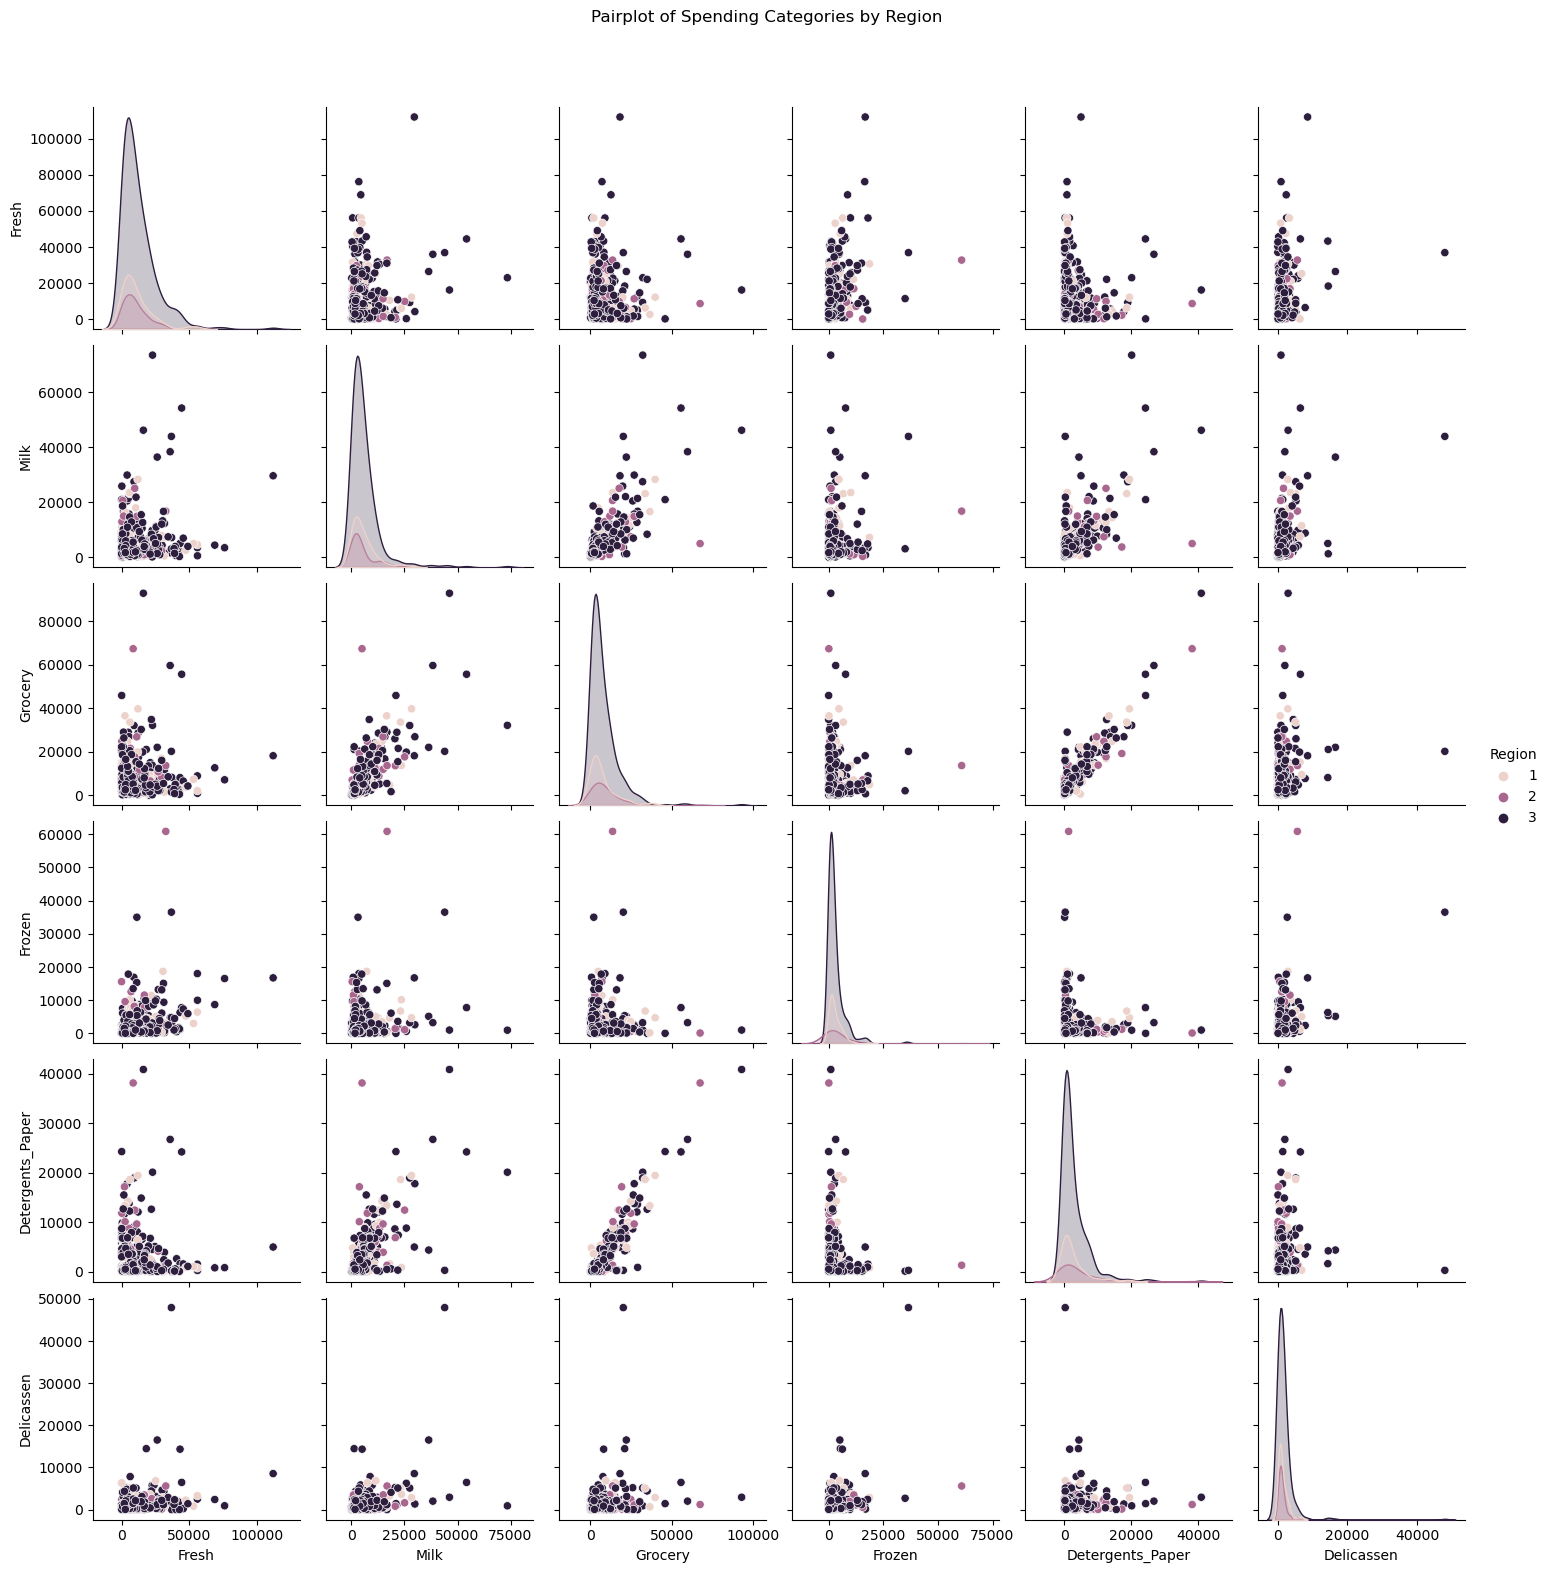

In [7]:
#warnings about FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="pandas.core.common")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

X['Region'] = y['Region']

sns.pairplot(X, vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], hue='Region')
plt.suptitle('Pairplot of Spending Categories by Region', y=1.05)  # Adjust the title position if needed
plt.show()


$\textbf{DBSCAN}$

$\textbf{TASK: Since the values of the features are in different orders of magnitude,}$
$\textbf{let's scale the data. Use StandardScaler to scale the data.}$

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


$\textbf{TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal}$
$\textbf{to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers.}$
$\textbf{For reference the solutions notebooks uses the following range of epsilon values for testing:}$

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define the range for epsilon values
eps_values = np.linspace(0.001, 3, 50)
min_samples = 2 * X_scaled.shape[1]  # 2 times the number of features

outlier_percentages = []

# Loop through the range of epsilon values
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X_scaled)
    
    # Labels of the cluster each sample belongs to
    labels = db.labels_
    
    # Percentage of points that are outliers
    # -1 labels are considered outliers in DBSCAN
    n_outliers = np.sum(labels == -1)
    n_samples = len(labels)
    outlier_percentage = 100 * n_outliers / n_samples
    
    outlier_percentages.append(outlier_percentage)


$\textbf{TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.}$

In [10]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define the range for epsilon values
eps_values = np.linspace(0.001, 3, 50)
min_samples = 2 * X_scaled.shape[1]  # 2 times the number of features

outlier_percentages = []

# Loop through the range of epsilon values
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X_scaled)
    
    # Labels of the cluster each sample belongs to
    labels = db.labels_
    
    # Percentage of points that are outliers
    # -1 labels are considered outliers in DBSCAN
    n_outliers = np.sum(labels == -1)
    n_samples = len(labels)
    outlier_percentage = 100 * n_outliers / n_samples
    
    outlier_percentages.append(outlier_percentage)

# This list now contains the percentage of outliers for each epsilon value


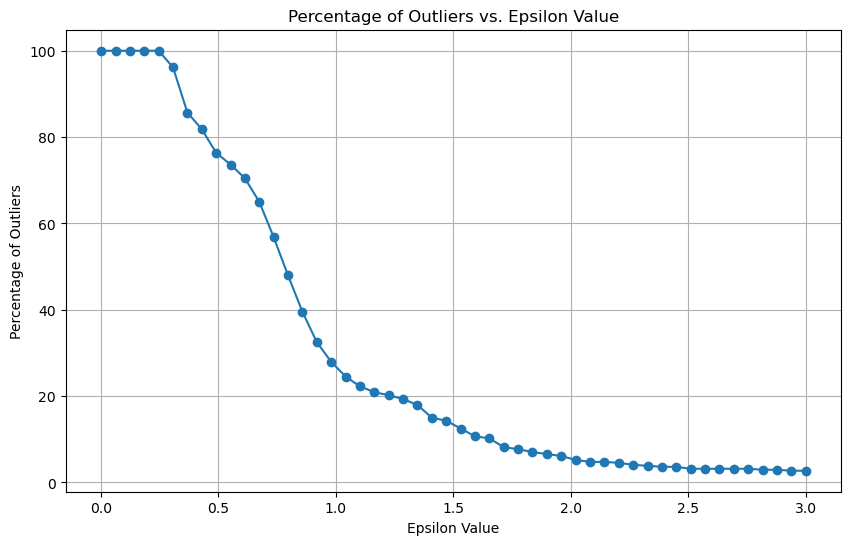

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(eps_values, outlier_percentages, marker='o')
plt.title('Percentage of Outliers vs. Epsilon Value')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers')
plt.grid(True)
plt.show()


In [11]:
import numpy as np

labels_unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(labels_unique, counts)))


{-1: 12, 0: 428}


$\textbf{DBSCAN with Chosen Epsilon}$

$\textbf{TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon}$
$\textbf{value. Note: For reference, the solutions use eps=2.}$

In [12]:
# Retrain DBSCAN with chosen eps value
db = DBSCAN(eps=1.5, min_samples=2 * X_scaled.shape[1])
db.fit(X_scaled)

# Extract and check the distribution of labels
labels = db.labels_
labels_unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(labels_unique, counts)))  # This will print the count of points in each cluster including outliers





{-1: 59, 0: 109, 1: 272}


$\textbf{TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.}$

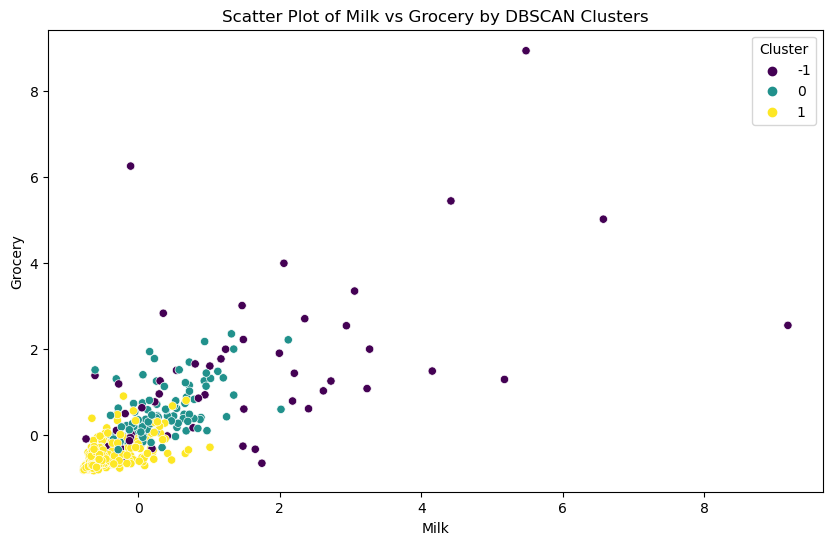

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, X.columns.get_loc("Milk")], y=X_scaled[:, X.columns.get_loc("Grocery")], hue=labels, palette='viridis')
plt.title('Scatter Plot of Milk vs Grocery by DBSCAN Clusters')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend(title='Cluster')
plt.show()

$\textbf{TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.}$

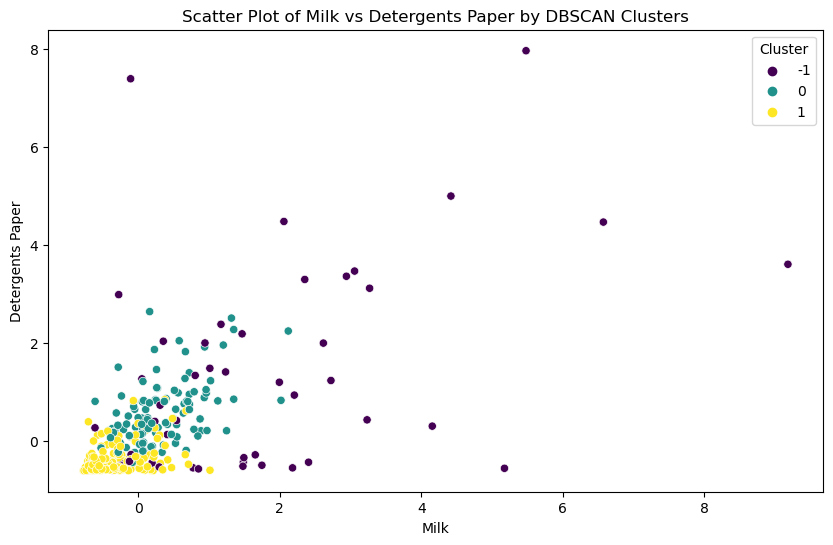

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, X.columns.get_loc("Milk")], y=X_scaled[:, X.columns.get_loc("Detergents_Paper")], hue=labels, palette='viridis')
plt.title('Scatter Plot of Milk vs Detergents Paper by DBSCAN Clusters')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.legend(title='Cluster')
plt.show()

$\textbf{TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.}$

In [15]:
X['Labels'] = labels

df['Labels'] = labels
df.head()


name,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,-1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


$\textbf{TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.}$

In [16]:
# Group by the labels to calculate means for each cluster
cluster_means = X.drop(columns=['Channel']).groupby('Labels').mean()
print(cluster_means)

               Fresh          Milk       Grocery       Frozen  \
Labels                                                          
-1      20844.627119  15488.711864  19658.288136  7707.728814   
 0       8379.055046   8061.422018  12785.532110  1353.366972   
 1      11533.018382   2786.132353   3474.632353  2755.062500   

        Detergents_Paper   Delicassen    Region  
Labels                                           
-1           7556.135593  4217.220339  2.135593  
 0           5611.036697  1332.311927  2.779817  
 1            773.683824  1018.033088  2.536765  


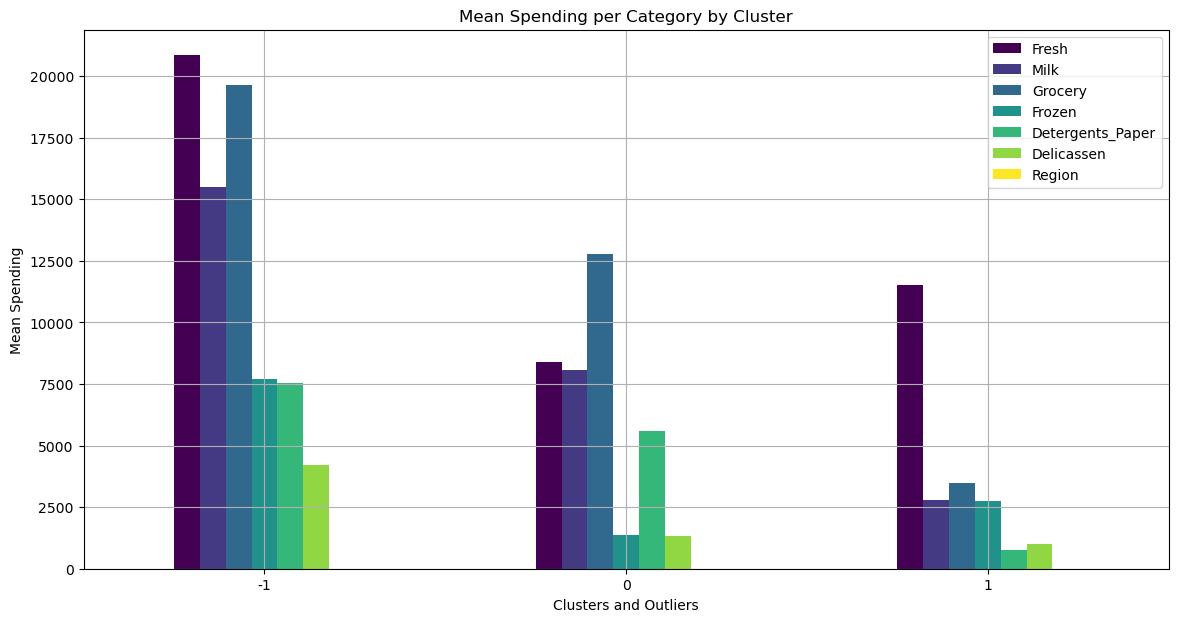

In [17]:
cluster_means.plot(kind='bar', figsize=(14, 7), colormap='viridis')
plt.title('Mean Spending per Category by Cluster')
plt.ylabel('Mean Spending')
plt.xlabel('Clusters and Outliers')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.grid(True)
plt.show()

$\textbf{TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and }$
$\textbf{create a heatmap of the values.}$

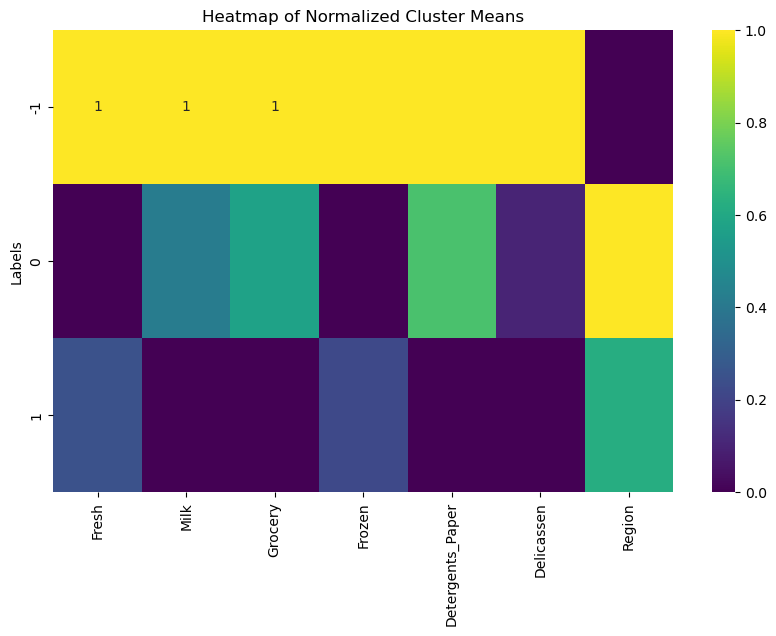

In [18]:


# Normalize the cluster means
scaler = MinMaxScaler()
cluster_scaled = scaler.fit_transform(cluster_means)
cluster_scaled_df = pd.DataFrame(cluster_scaled, columns=cluster_means.columns, index=cluster_means.index)

# Create heatmap of normalized means
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_scaled_df, annot=True, cmap='viridis')
plt.title('Heatmap of Normalized Cluster Means')
plt.show()


$\textbf{TASK: Create another heatmap similar to the one above, but with the outliers removed}$

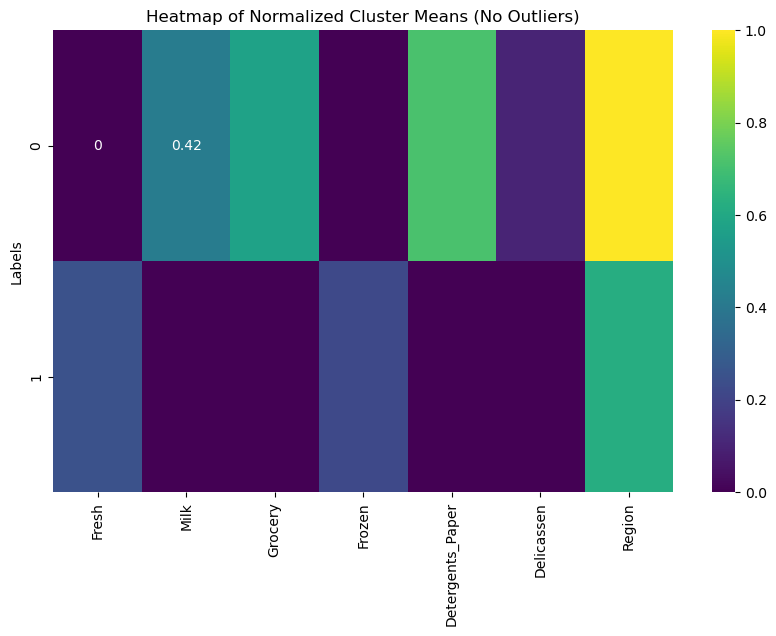

In [19]:
# Filter out outliers (label -1)
filtered_clusters = cluster_scaled_df.loc[cluster_scaled_df.index != -1]

# Redo heatmap with outliers removed
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_clusters, annot=True, cmap='viridis')
plt.title('Heatmap of Normalized Cluster Means (No Outliers)')
plt.show()


$\textbf{TASK: What spending category were the two clusters mode different in?}$

In [20]:
# Calculate the range (max - min) for each category across clusters
category_differences = filtered_clusters.max() - filtered_clusters.min()
most_different_category = category_differences.idxmax()
print(f"The category with the most difference between clusters is: {most_different_category}")


The category with the most difference between clusters is: Detergents_Paper
